In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [2]:
# count no. of images in respective classes i.e. 0= brain tumor and 1= healty
ROOT_DIR = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/Brain Tumor Data Set"

In [3]:
number_of_images = {}

In [4]:
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [5]:
number_of_images.items()

dict_items([('Brain Tumor', 263), ('Healthey', 219)])

In [6]:
# data splitting
def dataFolder(p, split):
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)

            for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                        size = (math.floor(split*number_of_images[dir])-5) ,
                                        replace=False ):
                O = os.path.join(ROOT_DIR,dir,img)
                D = os.path.join("./"+p, dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f"{p}folder already exist")

In [7]:
dataFolder("train", 0.75)

trainfolder already exist


In [8]:
dataFolder("validation",0.15)

validationfolder already exist


In [10]:
dataFolder("test",0.15)

In [11]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))
    
    
number_of_images.items()

dict_items([('Brain Tumor', 229), ('Healthey', 192)])

# Model Building

In [12]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

### CNN Model

In [13]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size=(3,3), activation= 'relu' , input_shape = (224,224,3) ))

model.add(Conv2D(filters = 36, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units= 1, activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [14]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

Preparing data using data generator

In [15]:
def preprocessImages(path):
    """
    input = path
    output = pre processed image
    """
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [16]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/train"
train_data = preprocessImages(path)

Found 3439 images belonging to 2 classes.


In [37]:
def preprocessImages1(path):
    """
    input = path
    output = pre processed image
    """
    image_data = ImageDataGenerator(rescale= 1/255)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [18]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/test"
test_data = preprocessImages1(path)

Found 61 images belonging to 2 classes.


In [19]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/validation"
val_data = preprocessImages1(path)

Found 679 images belonging to 2 classes.


In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 6, verbose= 1, mode = 'auto')

# Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose= 1, save_best_only= True, mode = 'auto')

cd = [es,mc]

### Model Training

In [25]:
hs = model.fit_generator(generator = train_data, 
                         steps_per_epoch= 8, 
                         epochs= 30, 
                         verbose= 1, 
                         validation_data= val_data, 
                         validation_steps= 16, 
                         callbacks= cd)

Epoch 1/30
8/8 [==============================] - 29s 4s/step - loss: 0.5467 - accuracy: 0.7188 - val_loss: 0.4947 - val_accuracy: 0.8027

Epoch 00001: val_accuracy improved from -inf to 0.80273, saving model to .\bestmodel.h5
Epoch 2/30
8/8 [==============================] - 29s 4s/step - loss: 0.4853 - accuracy: 0.7656 - val_loss: 0.4744 - val_accuracy: 0.7930

Epoch 00002: val_accuracy did not improve from 0.80273
Epoch 3/30
8/8 [==============================] - 29s 4s/step - loss: 0.5695 - accuracy: 0.7461 - val_loss: 0.4918 - val_accuracy: 0.8047

Epoch 00003: val_accuracy improved from 0.80273 to 0.80469, saving model to .\bestmodel.h5
Epoch 4/30
8/8 [==============================] - 29s 4s/step - loss: 0.5062 - accuracy: 0.7852 - val_loss: 0.4448 - val_accuracy: 0.8086

Epoch 00004: val_accuracy improved from 0.80469 to 0.80859, saving model to .\bestmodel.h5
Epoch 5/30
8/8 [==============================] - 29s 4s/step - loss: 0.5499 - accuracy: 0.7695 - val_loss: 0.4659 - va

In [26]:
h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

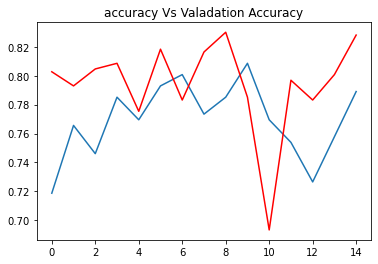

In [28]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title("accuracy Vs Valadation Accuracy")
plt.show()

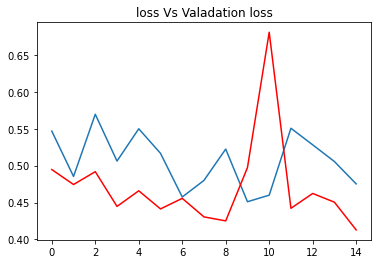

In [29]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title("loss Vs Valadation loss")
plt.show()

In [32]:
# Loding our best model
from keras.models import load_model

model = load_model("C:/Users/RWaghmare/Brain Tumour Detection Using CNN/bestmodel.h5")

### Accuracy of Model

In [33]:
accuracy = model.evaluate_generator(test_data)[1]

print(f" the accuracy of model is:{accuracy}")

 the accuracy of model is:0.8032786846160889


# Model Traning using Pretrained models

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [38]:
def preprocessImages(path):
    """
    input = path
    output = pre processed image
    """
    image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, preprocessing_function= preprocess_input, horizontal_flip= True)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [39]:
def preprocessImages1(path):
    """
    input = path
    output = pre processed image
    """
    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
    image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size= 32, class_mode = 'binary')
    
    return image

In [40]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/train"
train_data = preprocessImages(path)

Found 3439 images belonging to 2 classes.


In [41]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/test"
test_data = preprocessImages1(path)

Found 61 images belonging to 2 classes.


In [42]:
path = "C:/Users/RWaghmare/Brain Tumour Detection Using CNN/validation"
val_data = preprocessImages1(path)

Found 679 images belonging to 2 classes.


In [43]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False) 

17235968/17225924 [==============================] - 8s 0us/step


In [45]:
for layer in base_model.layers:
    layer.trainable = False
    

In [46]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [47]:
X = Flatten()(base_model.output)
X = Dense(units= 1, activation= 'sigmoid')(X)

model = Model(base_model.input, X)

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [50]:
model.compile(optimizer='rmsprop', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [51]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 3, verbose= 1)

# Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="bestmodel.h5", verbose= 1, save_best_only= True)

cd = [es,mc]

In [52]:
hist = model.fit_generator(train_data, 
                         steps_per_epoch= 8, 
                         epochs= 30, 
                         validation_data= val_data, 
                         validation_steps= 16, 
                         callbacks= cd)

Epoch 1/30
8/8 [==============================] - 31s 3s/step - loss: 12.6784 - accuracy: 0.5195 - val_loss: 5.3649 - val_accuracy: 0.5703

Epoch 00001: val_accuracy improved from -inf to 0.57031, saving model to bestmodel.h5
Epoch 2/30
8/8 [==============================] - 20s 3s/step - loss: 3.2544 - accuracy: 0.7197 - val_loss: 0.6829 - val_accuracy: 0.8750

Epoch 00002: val_accuracy improved from 0.57031 to 0.87500, saving model to bestmodel.h5
Epoch 3/30
8/8 [==============================] - 19s 3s/step - loss: 0.4011 - accuracy: 0.9158 - val_loss: 5.0956 - val_accuracy: 0.5645

Epoch 00003: val_accuracy did not improve from 0.87500
Epoch 4/30
8/8 [==============================] - 19s 3s/step - loss: 2.7470 - accuracy: 0.7214 - val_loss: 0.8317 - val_accuracy: 0.8516

Epoch 00004: val_accuracy did not improve from 0.87500
Epoch 5/30
8/8 [==============================] - 19s 3s/step - loss: 1.2371 - accuracy: 0.8384 - val_loss: 1.5585 - val_accuracy: 0.7969

Epoch 00005: val_ac

In [53]:
model = load_model("bestmodel.h5")

In [54]:
accuracy = model.evaluate_generator(test_data)[1]

print(f" the accuracy of model is:{accuracy*100} %")

 the accuracy of model is:88.52459192276001 %


In [55]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

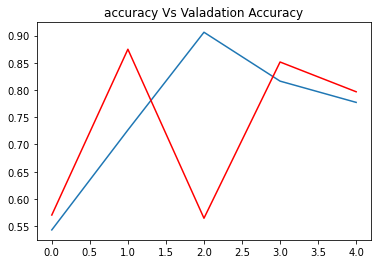

In [56]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title("accuracy Vs Valadation Accuracy")
plt.show()

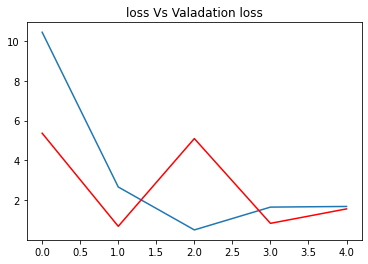

In [57]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title("loss Vs Valadation loss")
plt.show()